In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
nltk.download('word_tokenize')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Downloading package stopwords to C:\Users\Manya
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Manya
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import tweepy as tw
import pandas as pd
import numpy
import json
import re

In [27]:
import wordnet
import wordcloud
from wordcloud import WordCloud
import matplotlib

In [6]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
search_words = "#CORONA"
date_since = "2021-2-1"

In [9]:
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(100)

alltweets = [tweet.text for tweet in tweets]
alltweets[:10]

['RT @nisheethsharan: Heart breaking news coming in:\nShri @NandKumarSinghC ex BJP MP president and Memeber of Parliament passed away last nig…',
 'RT @nisheethsharan: Heart breaking news coming in:\nShri @NandKumarSinghC ex BJP MP president and Memeber of Parliament passed away last nig…',
 'RT @moneycontrolcom: #DidYouKnow? 92% of those who tried to register for #COVID19 vaccination through Co-WIN had difficulty with only 8% we…',
 '#DidYouKnow? 92% of those who tried to register for #COVID19 vaccination through Co-WIN had difficulty with only 8%… https://t.co/JLmYmTQNms',
 'RT @meiklwagner: Saint Claude - Christine And The Queens, 2015, \nNeon Gold/Atlantic/Because Music Rec.\nOn YouTube: https://t.co/ur9U1TrO3F…',
 'RT @meiklwagner: Blasphemous Rumours - Depeche Mode, 1984, Mute Records. On YouTube: https://t.co/QipGqZ1uwm\n\n#FridaysForFuture #SenKultEU…',
 "This'll be the next #corona rule @mattisbrilliant #PS4share\n\nhttps://t.co/Y0tFyUjXJN https://t.co/xdyXdkeFyI",
 '#Corona I

In [10]:
tweet_tokens=word_tokenize(alltweets[0])
print(tweet_tokens)

['RT', '@', 'nisheethsharan', ':', 'Heart', 'breaking', 'news', 'coming', 'in', ':', 'Shri', '@', 'NandKumarSinghC', 'ex', 'BJP', 'MP', 'president', 'and', 'Memeber', 'of', 'Parliament', 'passed', 'away', 'last', 'nig…']


In [11]:
print(pos_tag(tweet_tokens))

[('RT', 'NNP'), ('@', 'NNP'), ('nisheethsharan', 'NN'), (':', ':'), ('Heart', 'NNP'), ('breaking', 'VBG'), ('news', 'NN'), ('coming', 'VBG'), ('in', 'IN'), (':', ':'), ('Shri', 'NNP'), ('@', 'NNP'), ('NandKumarSinghC', 'NNP'), ('ex', 'FW'), ('BJP', 'NNP'), ('MP', 'NNP'), ('president', 'NN'), ('and', 'CC'), ('Memeber', 'NNP'), ('of', 'IN'), ('Parliament', 'NNP'), ('passed', 'VBD'), ('away', 'RB'), ('last', 'JJ'), ('nig…', 'NN')]


In [12]:


from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens))

['RT', '@', 'nisheethsharan', ':', 'Heart', 'break', 'news', 'come', 'in', ':', 'Shri', '@', 'NandKumarSinghC', 'ex', 'BJP', 'MP', 'president', 'and', 'Memeber', 'of', 'Parliament', 'pass', 'away', 'last', 'nig…']


In [13]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
cleaned_tokens_list=remove_noise(tweet_tokens, stop_words)
print(cleaned_tokens_list)

['rt', 'nisheethsharan', 'heart', 'break', 'news', 'come', 'shri', 'nandkumarsinghc', 'ex', 'bjp', 'mp', 'president', 'memeber', 'parliament', 'pass', 'away', 'last', 'nig…']


In [15]:
'''def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(cleaned_tokens_list)'''

'def get_all_words(cleaned_tokens_list):\n    for tokens in cleaned_tokens_list:\n        for token in tokens:\n            yield token\n\nall_pos_words = get_all_words(cleaned_tokens_list)'

[nltk_data] Downloading package webtext to C:\Users\Manya
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


away: 1
bjp: 1
break: 1
come: 1
ex: 1
heart: 1
last: 1
memeber: 1
mp: 1
nandkumarsinghc: 1
news: 1
nig…: 1
nisheethsharan: 1
parliament: 1
pass: 1
president: 1
rt: 1
shri: 1


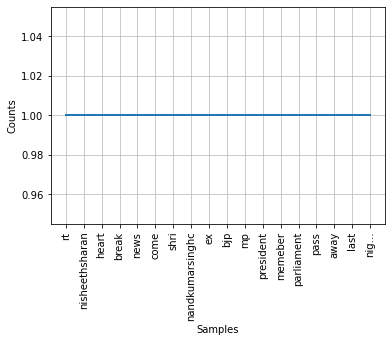

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
nltk.download('webtext')
wt_words = cleaned_tokens_list
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items()]) #if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)
